<big>Task1: Data dimensionality, distance-based classifiers

<big>Task1_1

With this experiment, we want to use different algorithms to classify hand-written digits in the dataset and use dimensionality reduction techniques to visualize them as well as compare the performances.

First, let us import packages we need.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy.ma as ma
from sklearn.decomposition import PCA
import umap
from sklearn.manifold import TSNE


use load_data() function to read all data from training set and test set

In [4]:
def load_data():
    train_in = pd.read_csv('./data/train_in.csv', header=None)
    test_in = pd.read_csv('./data/test_in.csv', header=None)
    train_out = pd.read_csv('./data/train_out.csv', header=None)
    test_out = pd.read_csv('./data/test_out.csv', header=None)
    return np.array(train_in), np.array(test_in), np.array(train_out), np.array(test_out)

test it

In [5]:
train_in, test_in, train_out, test_out = load_data()
print(train_in.shape)
print(test_in.shape)
print(train_out.shape)
print(test_out.shape)

(1707, 256)
(1000, 256)
(1707, 1)
(1000, 1)


To calculate centers of each digit, use function called center_compute.



Define N as the number of 10 digits' centers

In [6]:
N = 10

In [7]:
def center_compute(train_in, train_out):
    number = dict.fromkeys(train_out[:].reshape(1, -1)[0].astype(int), [0])
    center = np.zeros(shape=(N, train_in.shape[1]))
    for i in number.keys():
        l = []
        for j, character in enumerate(train_out):
            if character == i:
                l.append(j)
        number[i] = l
    print(number)
    for d in number.keys():
        center[d] = np.mean(train_in[number[d]], axis=0)
    return center

Now we have to test this function by using the first 20 rows in training set.

'number' is the dictionary mapping digit to those rows in training set that are labeled as this digit. We can see from the output that the 4th and 6th rows are labled as 3, and the result of center[3] is the same as the mean of these 2 rows.  

In [8]:
centers = center_compute(train_in[:20], train_out[:20])
print(centers[3])
print(np.mean(train_in[[4, 6]], axis=0))

{6: [0, 5], 5: [1], 4: [2, 16], 7: [3, 10, 14, 15], 3: [4, 6], 1: [7, 9, 12, 13, 19], 0: [8, 11, 18], 8: [17]}
[-1.     -1.     -1.     -0.915  -0.279   0.036   0.398   0.615   0.069
 -0.3565 -0.9045 -1.     -1.     -1.     -1.     -1.     -1.     -1.
 -1.     -0.5125  0.0745  0.4315  0.6695  0.881   1.      0.728  -0.0315
 -0.945  -1.     -1.     -1.     -1.     -1.     -1.     -1.     -1.
 -0.192   0.     -0.156  -0.71   -0.4085  0.751   0.8405 -0.621  -1.
 -1.     -1.     -1.     -1.     -1.     -1.     -1.     -0.688  -0.593
 -0.937  -1.     -1.     -0.2405  1.     -0.266  -1.     -1.     -1.
 -1.     -1.     -1.     -1.     -1.     -1.     -1.     -1.     -1.
 -0.989  -0.109   1.     -0.3715 -1.     -1.     -1.     -1.     -1.
 -1.     -1.     -1.     -1.     -0.999  -0.6705 -0.352  -0.2075  0.752
  0.681  -0.895  -1.     -1.     -1.     -1.     -1.     -1.     -1.
 -1.     -1.     -0.504   0.1255  0.5915  0.968   1.      0.376  -0.843
 -1.     -1.     -1.     -1.     -1.     -1. 

Next, we can classify images by counting their distance to centers. The nearest one will be the label.

The digit_recognization function will be used to recognize test set as well as return the accuracy.

In [9]:
def digit_recognization(center, test_in, test_out):
    recognization = np.zeros_like(test_out)
    for i, t in enumerate(test_in):
        distance = []
        for j, c in enumerate(center):
            distance.append(np.linalg.norm(t - c))
        recognization[i] = np.argmin(np.array(distance))
    accuracy = np.sum(recognization == test_out, dtype=float)/len(test_out)
    return recognization, accuracy

Now test this function by using the first 20 rows in test set.

In [10]:
recognization, accuracy = digit_recognization(centers, test_in[:20], test_out[:20])
print(np.sum(test_out[:20]==recognization))
print(accuracy)

18
0.9


In the first 20 rows, the number of being correctly recognized is 18, therefore the accuracy is 90%. It seems not bad.

Next, we can use the similar way to calculate distance between centers in order to find the pair that is most difficult to separate.

In [11]:
def dis_between_centers(center):
    dis_matrix = np.zeros(shape=(N, N))
    center_copy = np.copy(center)
    for i, ci in enumerate(center_copy):
        for j, cj in enumerate(center):
            if i != j:
                dis_matrix[i][j] = np.linalg.norm(ci-cj)
    
    m_matrix = ma.masked_array(dis_matrix, mask=np.identity(dis_matrix.shape[0]))
    indice = np.where(m_matrix == np.min(m_matrix))
    return dis_matrix, indice

We can see the matrix in which each element represents the distance between centers of digit i and digit j. By using only the first 20 rows to calculate centers, we found 2 and 9 are hard to seperate.

In [12]:
matrix, indice = dis_between_centers(centers)
print(matrix)
print(indice)

[[ 0.         14.07809672 10.88522478 11.97769725 11.08140652 14.29668624
   8.91705427 10.3338964  14.98178817 10.88522478]
 [14.07809672  0.         14.76557833 12.89949158 11.31112644 18.68740464
  13.24978756 10.1715783  18.40719934 14.76557833]
 [10.88522478 14.76557833  0.         13.23612508 12.55277523 14.00840273
  12.4207839  12.63997363 14.03806636  0.        ]
 [11.97769725 12.89949158 13.23612508  0.         11.93209138 14.88847045
  11.79645996 11.57966399 15.96441879 13.23612508]
 [11.08140652 11.31112644 12.55277523 11.93209138  0.         17.01142831
  11.36824088  9.0216323  15.45124979 12.55277523]
 [14.29668624 18.68740464 14.00840273 14.88847045 17.01142831  0.
  15.59861249 16.29567603 18.89295625 14.00840273]
 [ 8.91705427 13.24978756 12.4207839  11.79645996 11.36824088 15.59861249
   0.         11.43057394 15.61507287 12.4207839 ]
 [10.3338964  10.1715783  12.63997363 11.57966399  9.0216323  16.29567603
  11.43057394  0.         15.75793581 12.63997363]
 [14.981

<big>Task1_2</big>

Next, use PCA, U-MAP, T-SNE to generate a visualization of the different classes.

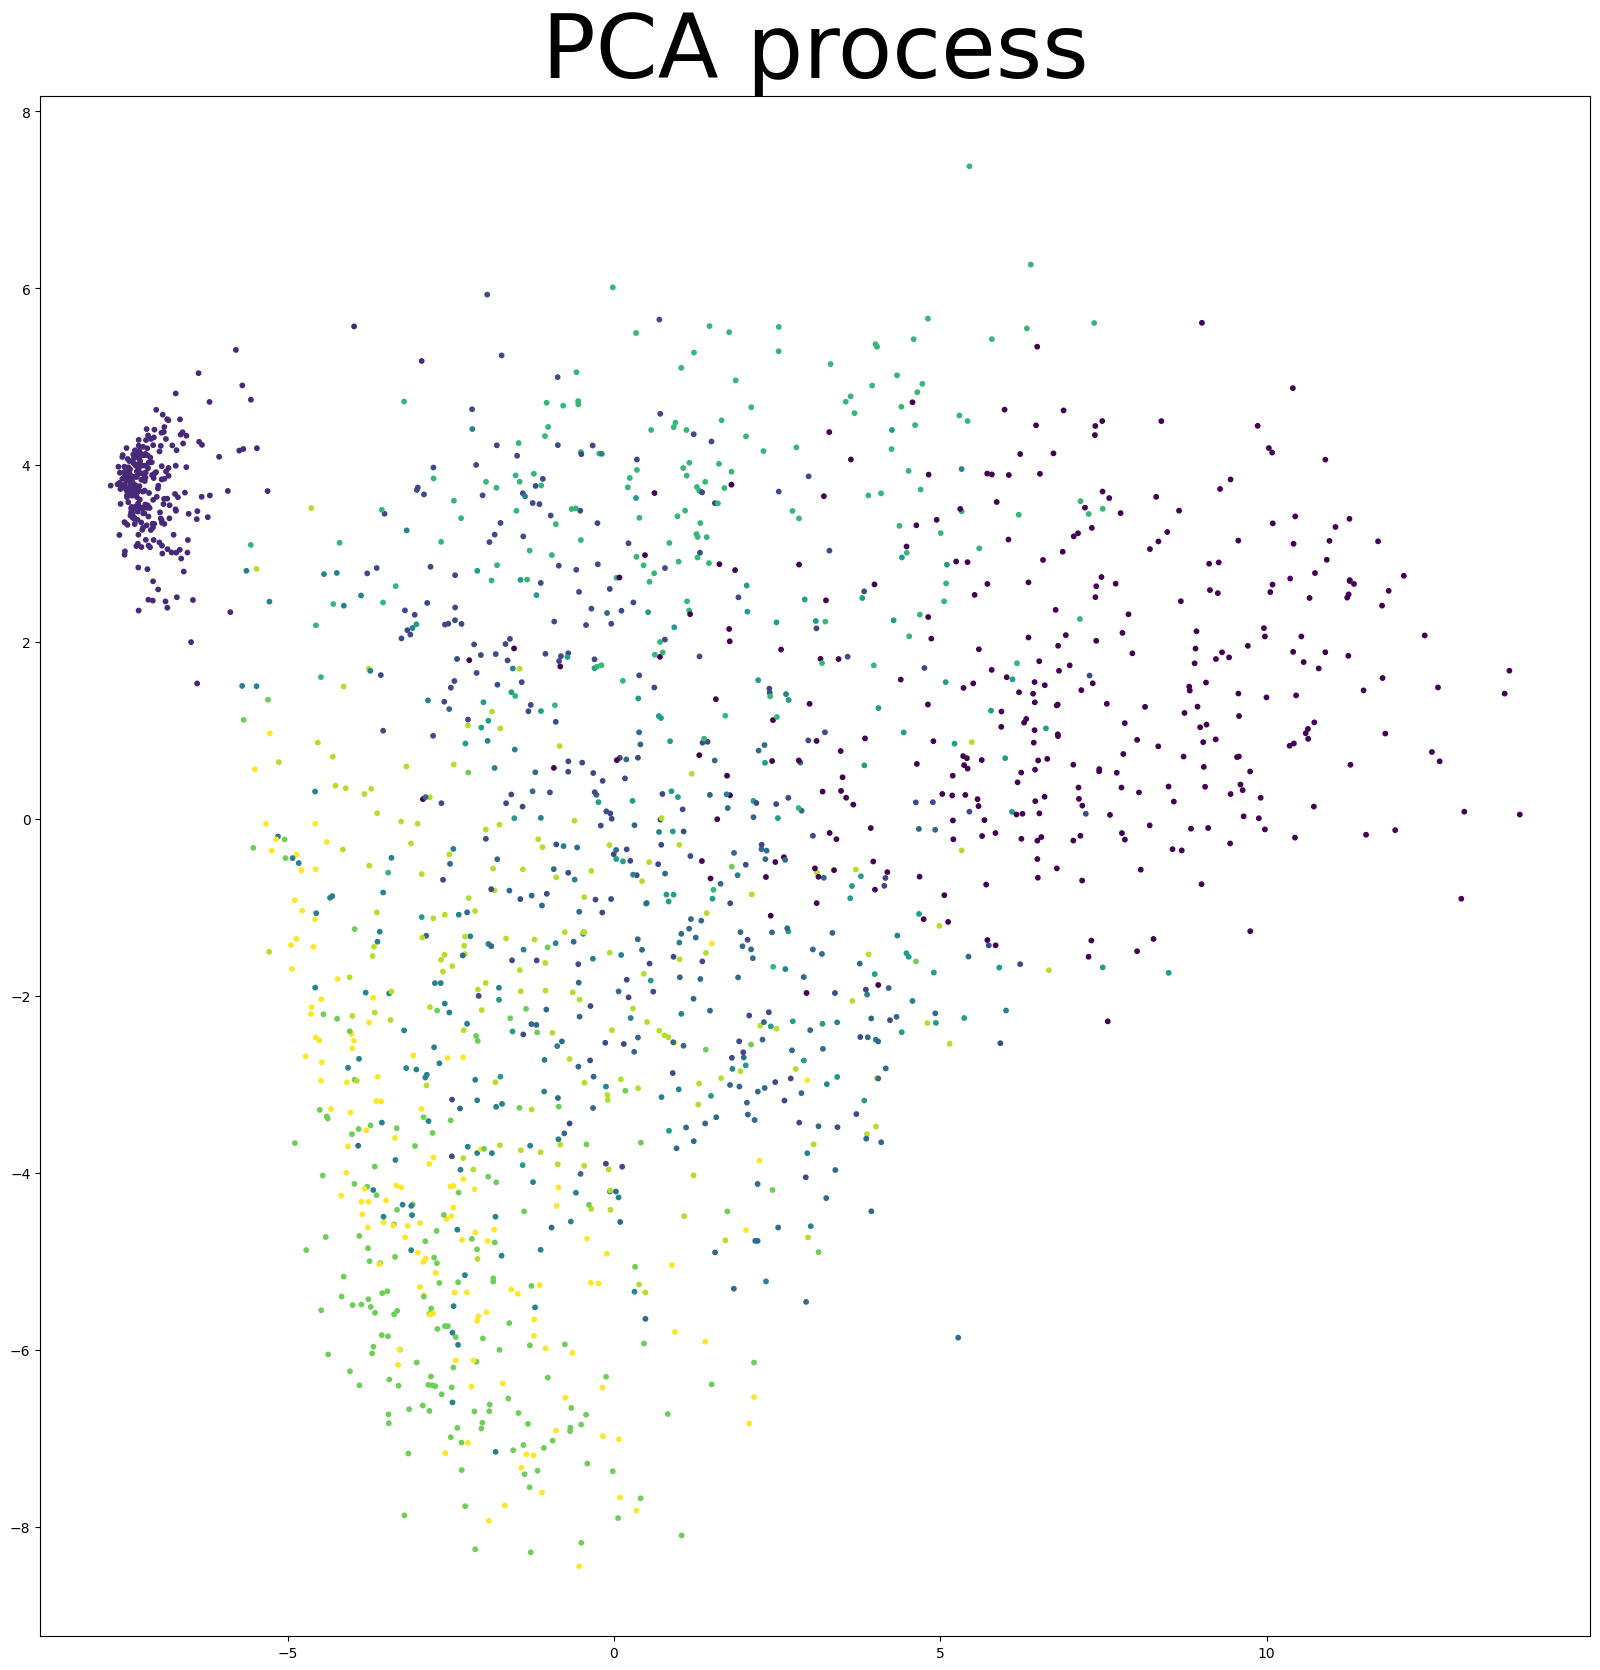

In [13]:
pca = PCA(n_components=2)
x_p = pca.fit_transform(train_in)
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot()
ax.set_title('PCA process', fontsize=64)
ax.scatter(x_p[:,0], x_p[:,1], c=train_out, s=10)
plt.show()

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


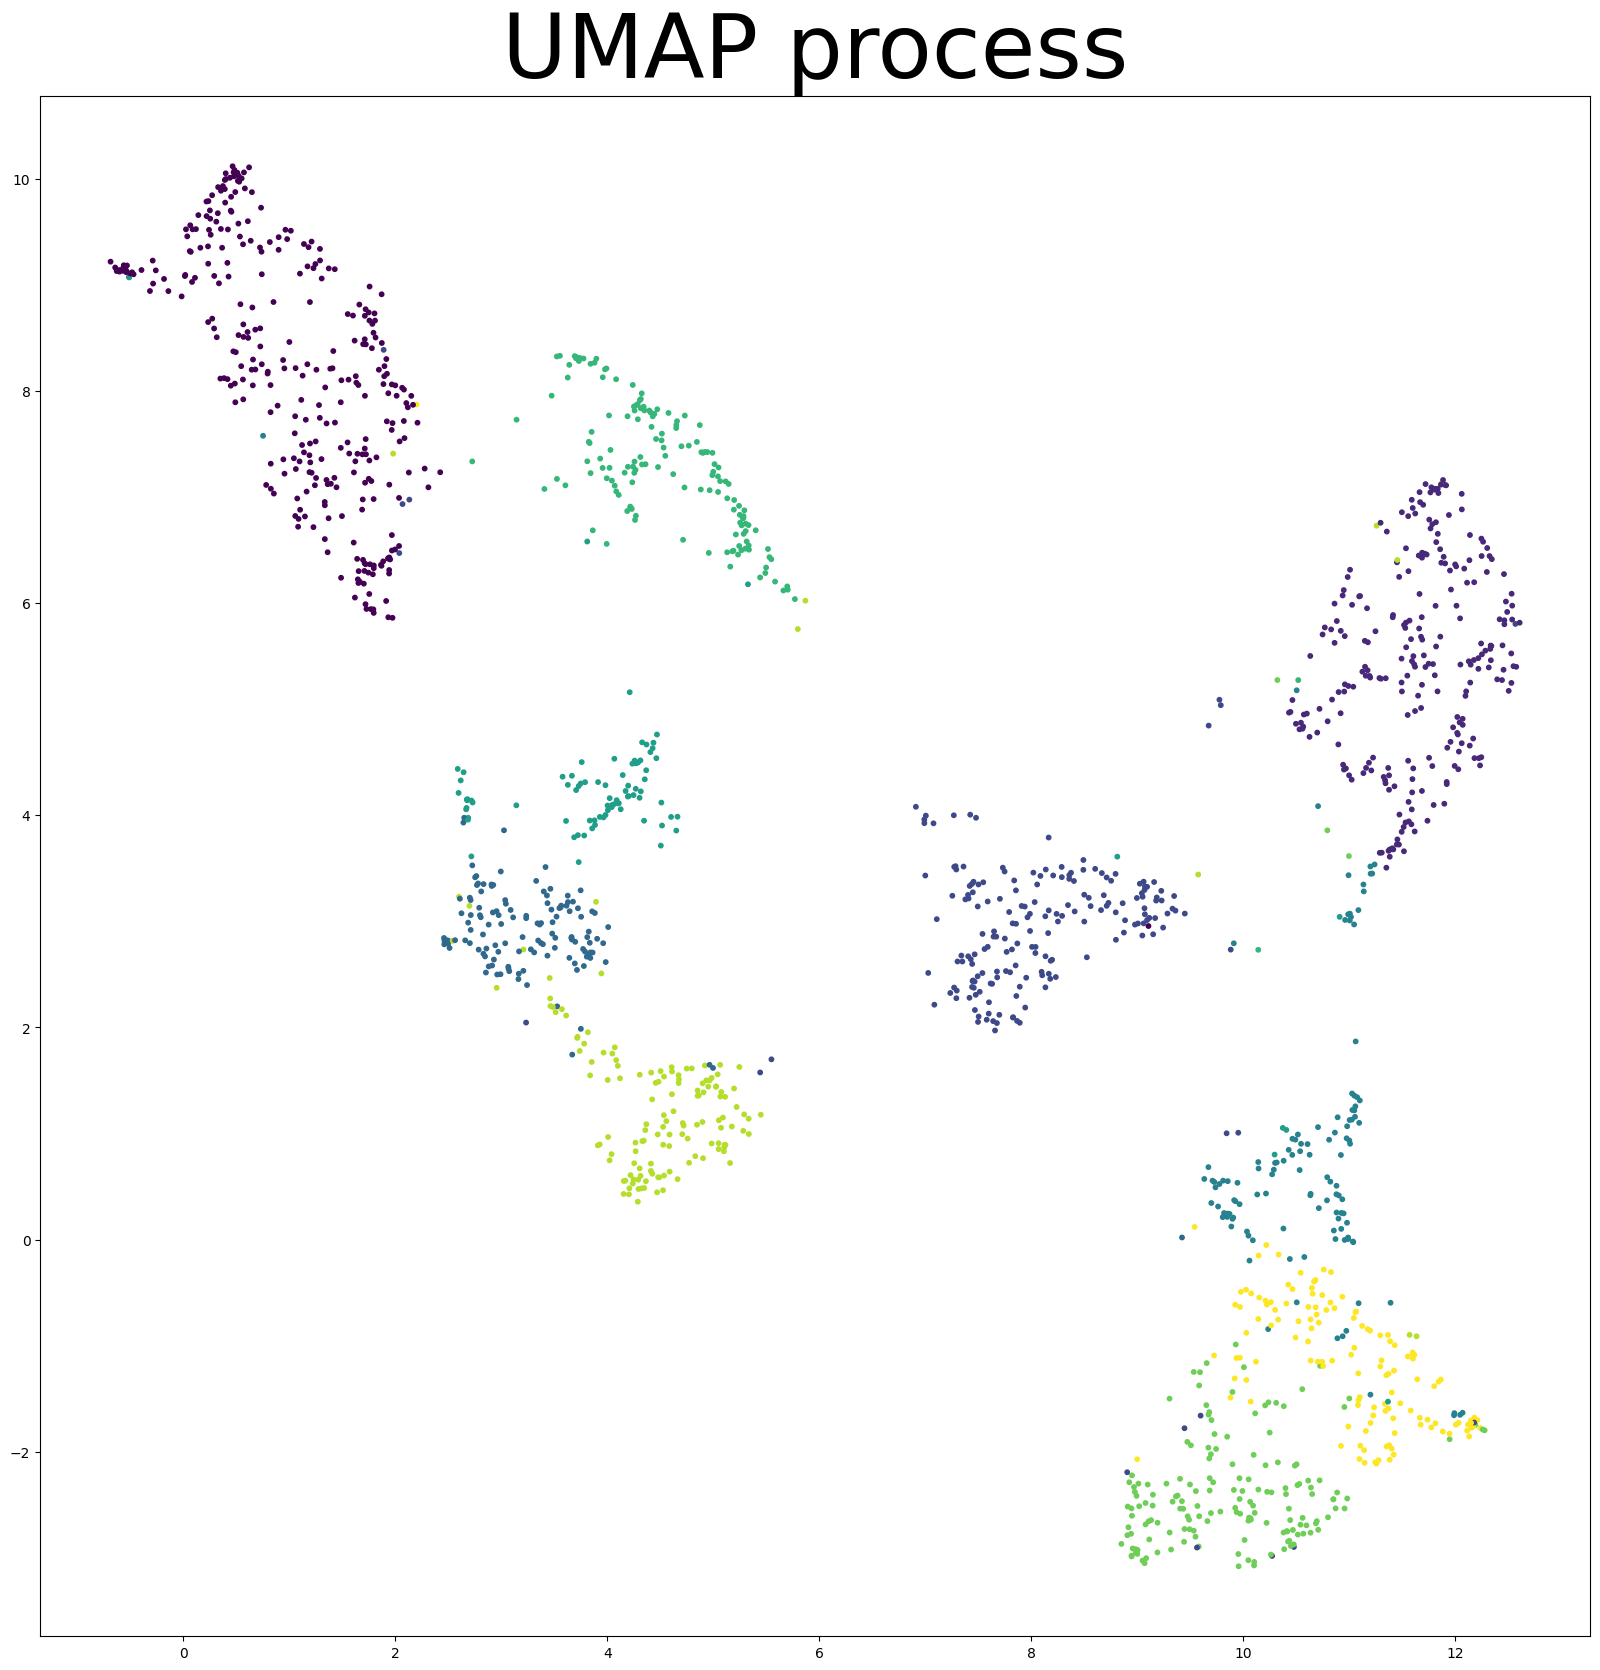

In [14]:
u = umap.UMAP(n_components=2)
x_u = u.fit_transform(train_in)
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot()
ax.set_title('UMAP process', fontsize=64)
ax.scatter(x_u[:,0], x_u[:,1], c=train_out, s=10)
plt.show()

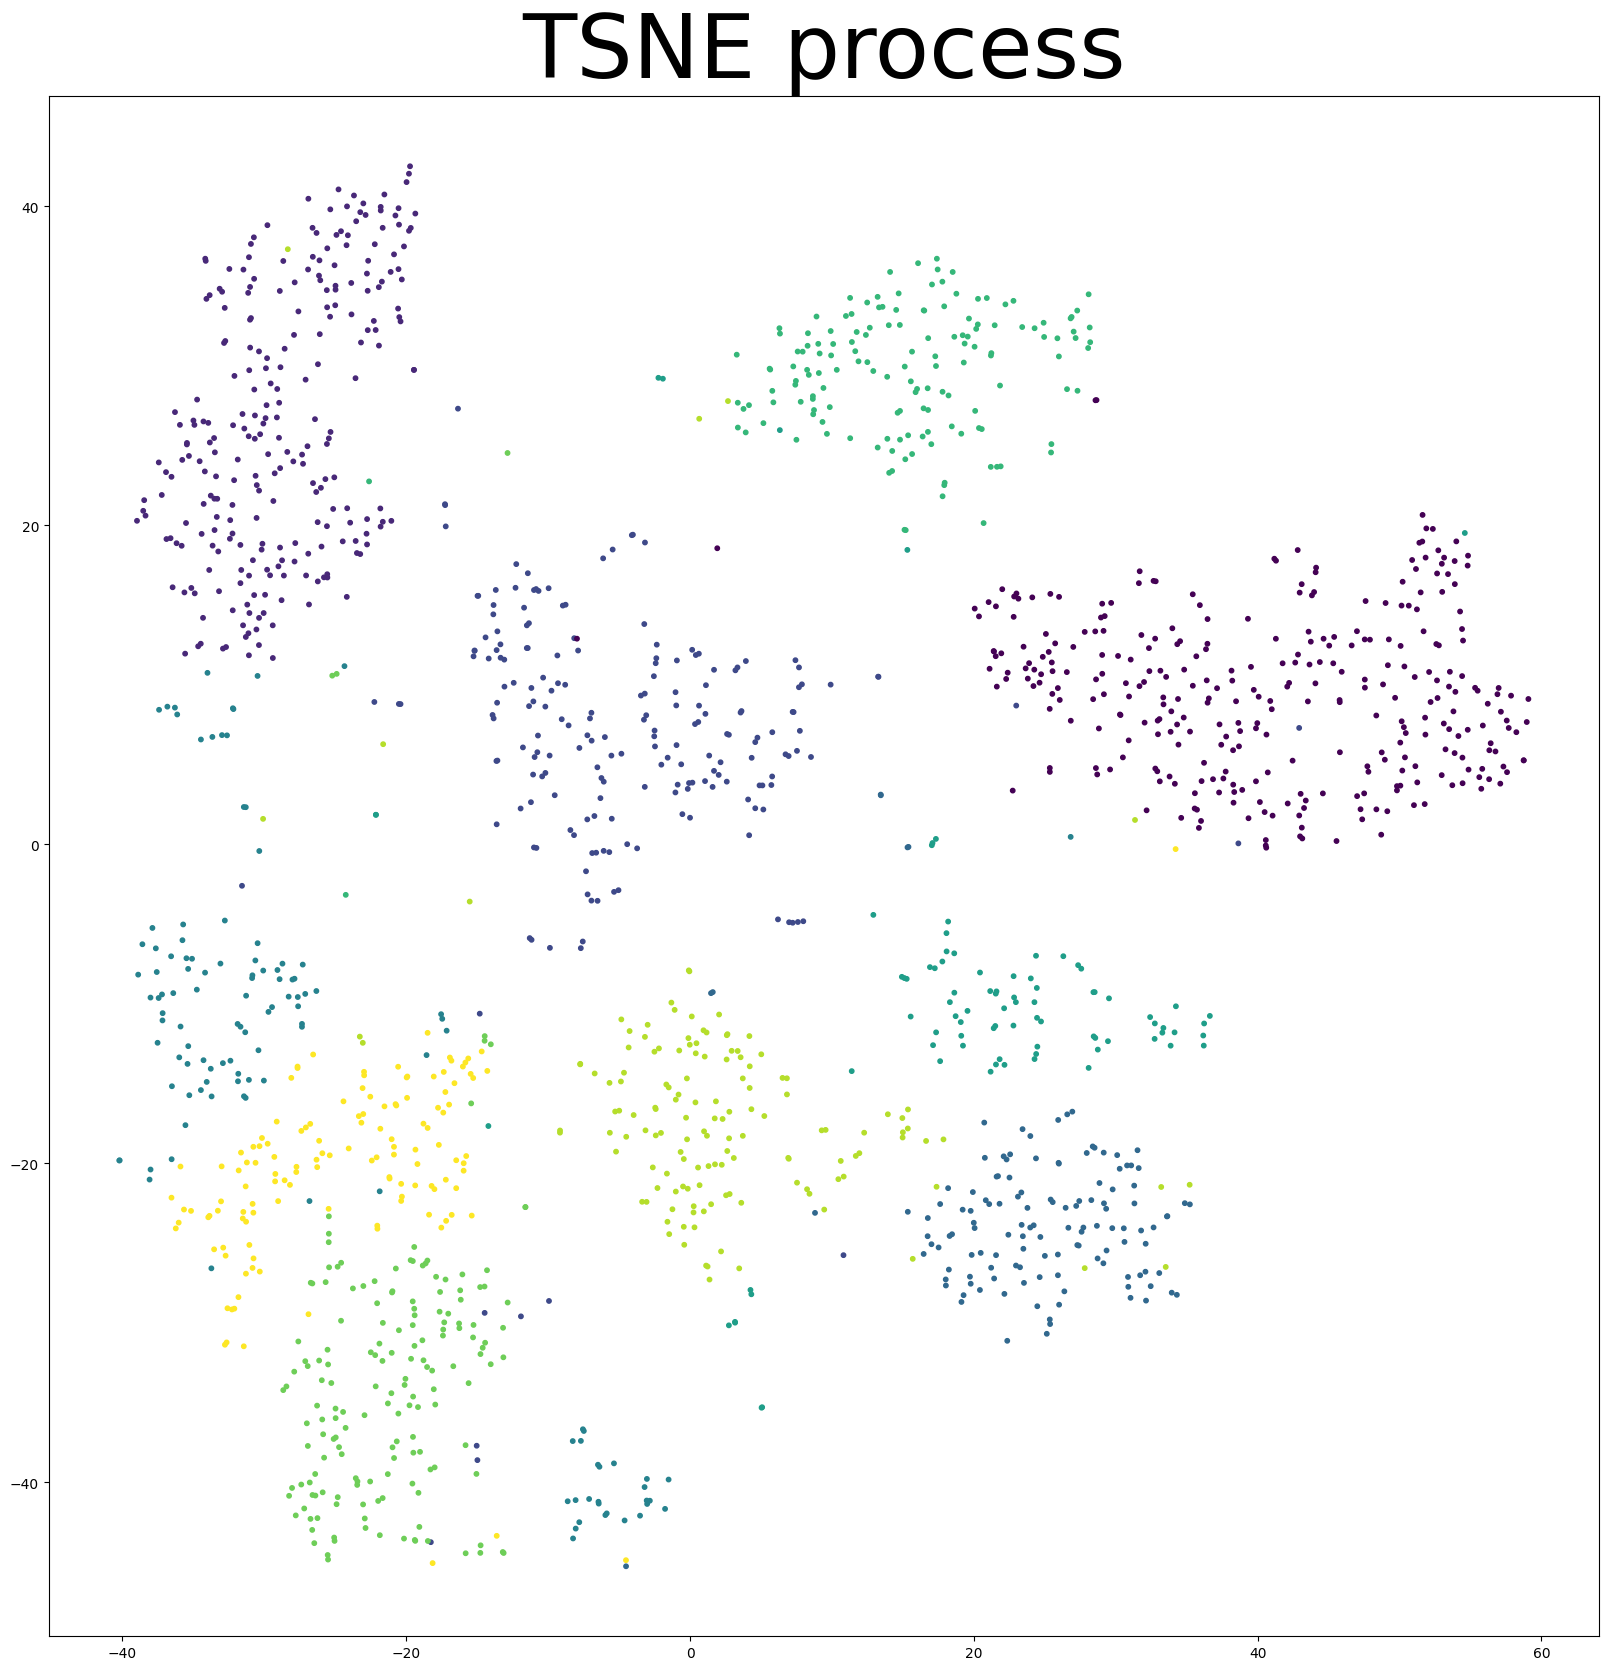

In [15]:
x_t = TSNE(n_components=2).fit_transform(train_in)
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot()
ax.set_title('TSNE process', fontsize=64)
ax.scatter(x_t[:,0], x_t[:,1], c=train_out, s=10)
plt.show()

We can see that UMAP and TSNE perform much better and nearly agree with the between-class distance matrix.

<big>Task1_3</big>

Now we can use the algorithm in task1_1 to implement a Nearest mean classifier

In [16]:
class Nearest_mean_classifier():
    def __init__(self, train_in, test_in, train_out, test_out):
        self.train_in = train_in
        self.test_in = test_in
        self.train_out = train_out
        self.test_out = test_out
        self.center = self.center_compute()
        self.train_recognization, self.train_accuracy = self.digit_recognization_train()
        self.test_recognization, self.test_accuracy = self.digit_recognization_test()
        self.dis_matrix, self.indice = self.dis_between_centers()
    
    def center_compute(self):
        number = dict.fromkeys(self.train_out[:].reshape(1, -1)[0].astype(int), [0])
        center = np.zeros(shape=(N, self.train_in.shape[1]))
        for i in number.keys():
            l = []
            for j, character in enumerate(self.train_out):
                if character == i:
                    l.append(j)
            number[i] = l
        for d in number.keys():
            center[d] = np.mean(self.train_in[number[d]], axis=0)
        return center

    def digit_recognization_train(self):
        recognization = np.zeros_like(self.train_out)
        for i, t in enumerate(self.train_in):
            distance = []
            for j, c in enumerate(self.center):
                distance.append(np.linalg.norm(t - c))
            recognization[i] = np.argmin(np.array(distance))
        accuracy = np.sum(recognization == self.train_out, dtype=float)/len(self.train_out)
        return recognization, accuracy
    
    def digit_recognization_test(self):
        recognization = np.zeros_like(self.test_out)
        for i, t in enumerate(self.test_in):
            distance = []
            for j, c in enumerate(self.center):
                distance.append(np.linalg.norm(t - c))
            recognization[i] = np.argmin(np.array(distance))
        accuracy = np.sum(recognization == self.test_out, dtype=float)/len(self.test_out)
        return recognization, accuracy
    
    def dis_between_centers(self):
        dis_matrix = np.zeros(shape=(N, N))
        center_copy = np.copy(self.center)
        for i, ci in enumerate(center_copy):
            for j, cj in enumerate(self.center):
                if i != j:
                    dis_matrix[i][j] = np.linalg.norm(ci-cj)
        
        m_matrix = ma.masked_array(dis_matrix, mask=np.identity(dis_matrix.shape[0]))
        indice = np.where(m_matrix == np.min(m_matrix))
        return dis_matrix, indice

Now, input both training set and test set to see the accuracy and the closest number pair.

In [17]:
n_classifier = Nearest_mean_classifier(train_in, test_in, train_out, test_out)
print("Accuracy in training set", n_classifier.train_accuracy)
print("Accuracy in test set", n_classifier.test_accuracy)
print(n_classifier.dis_matrix)
print(n_classifier.indice)

Accuracy in training set 0.8635032220269478
Accuracy in test set 0.804
[[ 0.         14.44960797  9.33455587  9.14373367 10.76984444  7.51929626
   8.15444313 11.86455505  9.90790174 11.48887494]
 [14.44960797  0.         10.12532258 11.7332329  10.17378643 11.11880041
  10.61470037 10.74315367 10.08677677  9.9320937 ]
 [ 9.33455587 10.12532258  0.          8.17828489  7.93254148  7.90679632
   7.33180754  8.87253107  7.07751618  8.88774785]
 [ 9.14373367 11.7332329   8.17828489  0.          9.0876078   6.11875002
   9.30206473  8.92240093  7.02042489  8.35435012]
 [10.76984444 10.17378643  7.93254148  9.0876078   0.          8.00151741
   8.78223265  7.58301228  7.38090899  6.01040793]
 [ 7.51929626 11.11880041  7.90679632  6.11875002  8.00151741  0.
   6.69869172  9.21195402  6.96738648  8.25853807]
 [ 8.15444313 10.61470037  7.33180754  9.30206473  8.78223265  6.69869172
   0.         10.8882374   8.58722228 10.44000352]
 [11.86455505 10.74315367  8.87253107  8.92240093  7.58301228 

Now use NearestCentroid in sklearn to compare the result.

In [32]:
from sklearn.neighbors import NearestCentroid

nm = NearestCentroid()
nm.fit(train_in, train_out.ravel())
accuracy_train = nm.score(train_in, train_out)
accuracy_test = nm.score(test_in, test_out)
print(accuracy_train)
print(accuracy_test)

0.8635032220269478
0.804


<big>Task1_4</big>

Now we can implement KNN.

In [19]:
class K_Nearest_classifier():
    def __init__(self, train_in, test_in, train_out, test_out, k):
        self.k = k
        self.train_in = train_in
        self.test_in = test_in
        self.train_out = train_out
        self.test_out = test_out
        self.train_recognization, self.train_accuracy = self.k_classifier_train()
        self.test_recognization, self.test_accuracy = self.k_classifier_test()
        self.con_matrix = self.confusion_matrix()
    
    def k_classifier_train(self):
        k = self.k
        recognization = np.zeros_like(self.train_out)
        dist = np.zeros(shape=(len(self.train_in), len(self.train_in)))
        ks = dict.fromkeys(self.train_out[:].reshape(1, -1)[0].astype(int), [0])
        for i, ci in enumerate(self.train_in):
            for j, cj in enumerate(self.train_in):
                dist[i, j] = np.linalg.norm(ci-cj)
        # m_matrix = ma.masked_array(dist, mask=np.identity(dist.shape[0]))
        for d, cj in enumerate(self.train_in):
            ks[d] = dist[d].argsort()[:k]
            ks_d_array = np.array(ks[d])
            recognization[d] = np.argmax(np.bincount(self.train_out[ks_d_array].reshape(1, -1)[0]))
        accuracy = np.sum(recognization == self.train_out)/len(self.train_out)
        return recognization, accuracy
    
    def k_classifier_test(self):
        k = self.k
        recognization = np.zeros_like(self.test_out)
        dist = np.zeros(shape=(len(self.test_in), len(self.train_in)))
        ks = dict.fromkeys(self.test_out[:].reshape(1, -1)[0].astype(int), [0])
        for i, ci in enumerate(self.test_in):
            for j, cj in enumerate(self.train_in):
                dist[i, j] = np.linalg.norm(ci-cj)
        for d, cj in enumerate(self.test_in):
            ks[d] = dist[d].argsort()[:k]
            ks_d_array = np.array(ks[d])
            recognization[d] = np.argmax(np.bincount(self.train_out[ks_d_array].reshape(1, -1)[0]))
        accuracy = np.sum(recognization == self.test_out)/len(self.test_out)
        return recognization, accuracy
    def confusion_matrix(self):
        i = 0
        con_matrix = np.zeros(shape=(N, N))
        for _, ci in enumerate(self.test_out):
            if ci != self.test_recognization[i]:
                con_matrix[int(ci), int(self.test_recognization[i])] += 1
            i += 1
        return con_matrix

Let's compare the result of the classifier above with the result using KNeighborsClassifier in sklearn-package

Let k=5

In [33]:
from sklearn.neighbors import KNeighborsClassifier
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(train_in, train_out.ravel())
accuracy_train = knn.score(train_in, train_out)
accuracy_test = knn.score(test_in, test_out)
print(accuracy_train)
print(accuracy_test)

0.9660222612770943
0.908


In [21]:
k_classifier = K_Nearest_classifier(train_in, test_in, train_out, test_out, k)
print(k_classifier.train_accuracy)
print(k_classifier.test_accuracy)

0.9660222612770943
0.908


The accuracy is the same as the result using KNeighborsClassifier and higher than the result of Nearest Mean classifier.

Last, we implement functions to generate confusion matrices for training set and test set respectively.

In [22]:
def confusion_matrix_train(classifier):
        con_matrix_train = np.zeros(shape=(N, N))
        for i, ci in enumerate(classifier.train_out):
            con_matrix_train[ci[0], classifier.train_recognization[i][0]] += 1
        return con_matrix_train

In [23]:
def confusion_matrix_test(classifier):
        con_matrix_test = np.zeros(shape=(N, N))
        for i, ci in enumerate(classifier.test_out):
            con_matrix_test[ci[0], classifier.test_recognization[i][0]] += 1
        return con_matrix_test

test it

In [24]:
con_matrix_train_mean = confusion_matrix_train(n_classifier).astype(int)
print(con_matrix_train_mean)

[[271   0   0   0   2   4  36   0   6   0]
 [  0 252   0   0   0   0   0   0   0   0]
 [  3   0 167   9   9   1   3   4   6   0]
 [  0   0   2 120   1   3   0   1   3   1]
 [  0   8   1   0  95   0   3   0   0  15]
 [  3   0   2   3   4  67   3   1   2   3]
 [ 10   4   5   0   2   0 129   0   1   0]
 [  0   4   0   0   2   2   0 140   1  17]
 [  1   2   1  10   2   3   1   0 121   3]
 [  0   3   0   1  10   0   0   6   0 112]]


In [25]:
con_matrix_test_mean = confusion_matrix_test(n_classifier).astype(int)
print(con_matrix_test_mean)

[[178   0   3   2   4   2  23   1  10   1]
 [  0 120   0   0   0   0   1   0   0   0]
 [  2   0  69   6   8   1   0   2  13   0]
 [  3   0   3  61   1   8   0   0   1   2]
 [  1   3   3   0  69   0   1   1   0   8]
 [  3   0   0   6   3  38   1   0   0   4]
 [  7   0   2   0   2   1  78   0   0   0]
 [  0   2   1   0   5   0   0  50   0   6]
 [  3   2   0   6   3   3   0   0  73   2]
 [  0   5   0   0   8   0   0   5   2  68]]


In [26]:
con_matrix_train_k = confusion_matrix_train(k_classifier).astype(int)
print(con_matrix_train_k)

[[318   0   1   0   0   0   0   0   0   0]
 [  0 252   0   0   0   0   0   0   0   0]
 [  2   4 189   1   1   0   0   4   0   1]
 [  2   0   0 128   0   0   0   0   1   0]
 [  0   4   0   0 114   0   0   0   0   4]
 [  3   0   1   1   1  80   1   0   0   1]
 [  1   1   1   0   0   0 148   0   0   0]
 [  0   3   0   0   0   0   0 162   0   1]
 [  2   3   0   5   2   0   0   1 129   2]
 [  1   0   0   0   0   0   0   2   0 129]]


In [27]:
con_matrix_test_k = confusion_matrix_test(k_classifier).astype(int)
print(con_matrix_test_k)

[[219   0   2   0   1   0   1   0   0   1]
 [  0 119   0   0   0   0   2   0   0   0]
 [  7   2  84   1   0   0   1   3   3   0]
 [  3   0   2  70   0   2   0   0   0   2]
 [  0   2   2   0  79   0   0   1   0   2]
 [  7   1   0   8   1  35   0   0   0   3]
 [  3   1   0   0   1   0  85   0   0   0]
 [  0   4   0   1   2   0   0  56   0   1]
 [  2   2   0   5   0   0   1   1  79   2]
 [  1   0   0   0   0   0   0   4   1  82]]


Let's compare the result above with that using sklearn-package.

In [28]:
from sklearn.metrics import confusion_matrix

con_matrix_mean_train = confusion_matrix(n_classifier.train_out, n_classifier.train_recognization)
con_matrix_mean_test = confusion_matrix(n_classifier.test_out, n_classifier.test_recognization)

print(con_matrix_mean_train)
print(con_matrix_mean_test)

[[271   0   0   0   2   4  36   0   6   0]
 [  0 252   0   0   0   0   0   0   0   0]
 [  3   0 167   9   9   1   3   4   6   0]
 [  0   0   2 120   1   3   0   1   3   1]
 [  0   8   1   0  95   0   3   0   0  15]
 [  3   0   2   3   4  67   3   1   2   3]
 [ 10   4   5   0   2   0 129   0   1   0]
 [  0   4   0   0   2   2   0 140   1  17]
 [  1   2   1  10   2   3   1   0 121   3]
 [  0   3   0   1  10   0   0   6   0 112]]
[[178   0   3   2   4   2  23   1  10   1]
 [  0 120   0   0   0   0   1   0   0   0]
 [  2   0  69   6   8   1   0   2  13   0]
 [  3   0   3  61   1   8   0   0   1   2]
 [  1   3   3   0  69   0   1   1   0   8]
 [  3   0   0   6   3  38   1   0   0   4]
 [  7   0   2   0   2   1  78   0   0   0]
 [  0   2   1   0   5   0   0  50   0   6]
 [  3   2   0   6   3   3   0   0  73   2]
 [  0   5   0   0   8   0   0   5   2  68]]


In [29]:
con_matrix_k_train = confusion_matrix(k_classifier.train_out, k_classifier.train_recognization)
con_matrix_k_test = confusion_matrix(k_classifier.test_out, k_classifier.test_recognization)

print(con_matrix_k_train)
print(con_matrix_k_test)

[[318   0   1   0   0   0   0   0   0   0]
 [  0 252   0   0   0   0   0   0   0   0]
 [  2   4 189   1   1   0   0   4   0   1]
 [  2   0   0 128   0   0   0   0   1   0]
 [  0   4   0   0 114   0   0   0   0   4]
 [  3   0   1   1   1  80   1   0   0   1]
 [  1   1   1   0   0   0 148   0   0   0]
 [  0   3   0   0   0   0   0 162   0   1]
 [  2   3   0   5   2   0   0   1 129   2]
 [  1   0   0   0   0   0   0   2   0 129]]
[[219   0   2   0   1   0   1   0   0   1]
 [  0 119   0   0   0   0   2   0   0   0]
 [  7   2  84   1   0   0   1   3   3   0]
 [  3   0   2  70   0   2   0   0   0   2]
 [  0   2   2   0  79   0   0   1   0   2]
 [  7   1   0   8   1  35   0   0   0   3]
 [  3   1   0   0   1   0  85   0   0   0]
 [  0   4   0   1   2   0   0  56   0   1]
 [  2   2   0   5   0   0   1   1  79   2]
 [  1   0   0   0   0   0   0   4   1  82]]


The results are the same.